## Seaborn 연습문제

#### 필요할 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

#### seaborn 라이브러리를 이용하여 다음 질문에 맞는 플롯을 시각화하시오.
- 데이터셋 : Seaborn에서 제공하는 타이타닉 데이터

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. 클래스(class)별 승객수

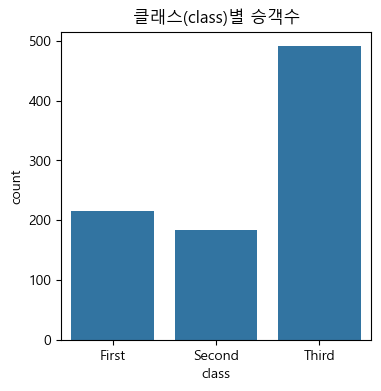

In [4]:
plt.figure(figsize=(4,4))
sns.countplot(data=titanic, x='class')
plt.title('클래스(class)별 승객수')
plt.show()

2. 성별(sex)에 따른 평균생존률

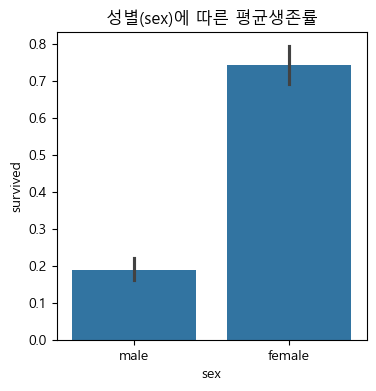

In [5]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, x='sex', y='survived')
plt.title('성별(sex)에 따른 평균생존률')
plt.show()

3. 성별에 따른 나이 분포

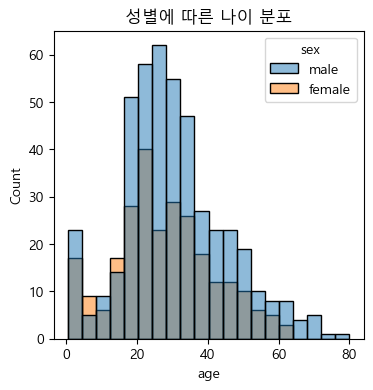

In [62]:
plt.figure(figsize=(4,4))
sns.histplot(data=titanic, x='age', hue='sex')
plt.title('성별에 따른 나이 분포')
plt.show()

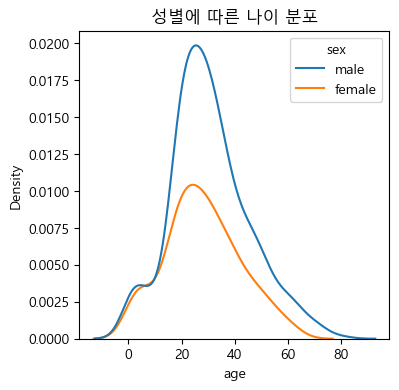

In [63]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=titanic, x='age', hue='sex')
plt.title('성별에 따른 나이 분포')
plt.show()

4. 클래스별 나이 분포

In [76]:
titanic['age_n'] = titanic.groupby(['sex', 'class'])['age'].transform(lambda x:x.fillna(x.mean()))

C:\Users\acorn1\AppData\Local\Temp\ipykernel_8712\3249970987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic['age_n'] = titanic.groupby(['sex', 'class'])['age'].transform(lambda x:x.fillna(x.mean()))


In [77]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,age_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20대,22.00
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30대,38.00
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20대,26.00
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30대,35.00
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30대,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,20대,27.00
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,10대,19.00
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,21.75
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,20대,26.00


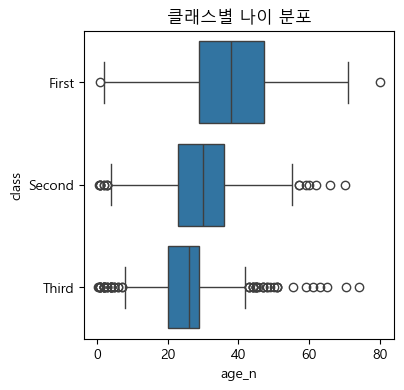

In [78]:
plt.figure(figsize=(4,4))
sns.boxplot(data=titanic, y='class', x='age_n')
plt.title('클래스별 나이 분포')
plt.show()

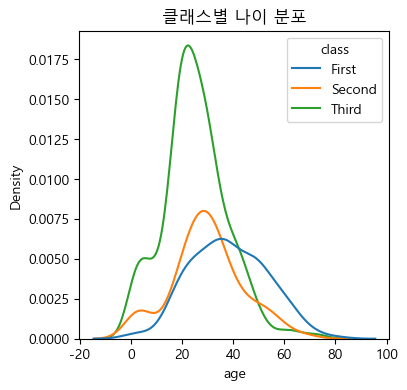

In [73]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=titanic, x='age', hue='class')
plt.title('클래스별 나이 분포')
plt.show()

5. 성별과 생존여부에 따른 나이 분포

In [80]:
titanic['survived_'] = titanic['survived'].map({0:'사망', 1:'생존'}).astype('category')
titanic['survived_'].value_counts()

survived_
사망    549
생존    342
Name: count, dtype: int64

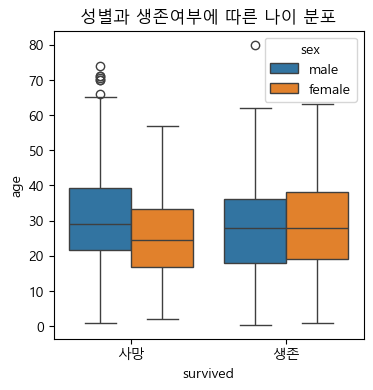

In [79]:
plt.figure(figsize=(4,4))
sns.boxplot(data=titanic, x='survived', y='age', hue='sex')
plt.title('성별과 생존여부에 따른 나이 분포')
plt.xticks([0,1], ['사망', '생존'])
plt.show()

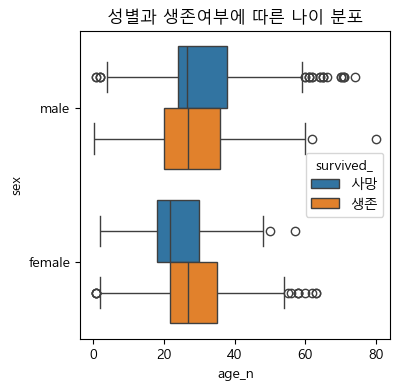

In [83]:
plt.figure(figsize=(4,4))
sns.boxplot(data=titanic, x='age_n', y='sex', hue='survived_')
plt.title('성별과 생존여부에 따른 나이 분포')
plt.show()

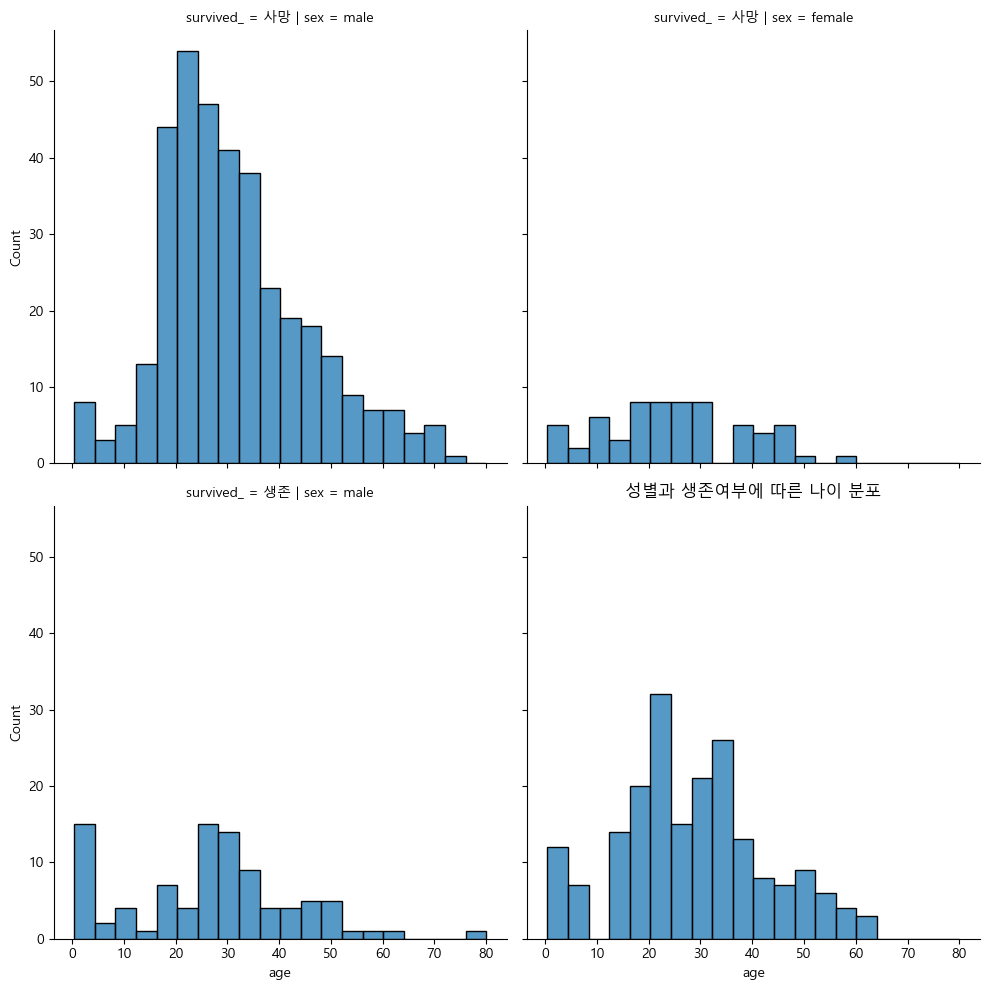

In [85]:
sns.displot(data=titanic, x='age', col='sex', row='survived_')
plt.title('성별과 생존여부에 따른 나이 분포')
plt.show()

In [86]:
gb5= titanic.groupby(['sex', 'survived_'], observed=True)
gb5['age'].mean()

sex     survived_
female  사망           25.046875
        생존           28.847716
male    사망           31.618056
        생존           27.276022
Name: age, dtype: float64

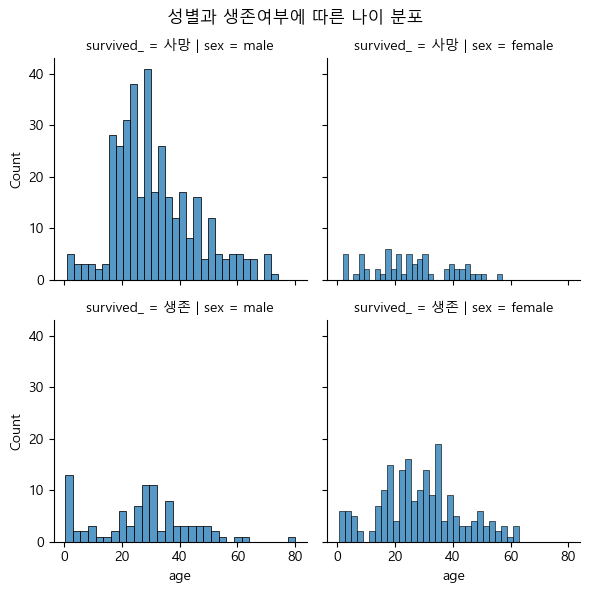

In [88]:
fg = sns.FacetGrid(data=titanic, col='sex', row='survived_')
fg.map(sns.histplot, 'age', bins=30)
fg.fig.subplots_adjust(top=0.9)
fg.fig.suptitle('성별과 생존여부에 따른 나이 분포')
plt.show()

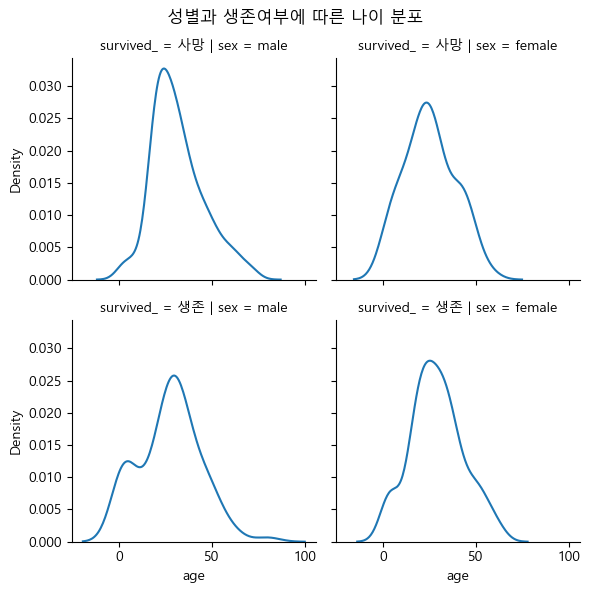

In [90]:
fg = sns.FacetGrid(data=titanic, col='sex', row='survived_')
fg.map(sns.kdeplot, 'age')
fg.fig.subplots_adjust(top=0.9)
fg.fig.suptitle('성별과 생존여부에 따른 나이 분포')
plt.show()

6. 나이와 요금의 관계

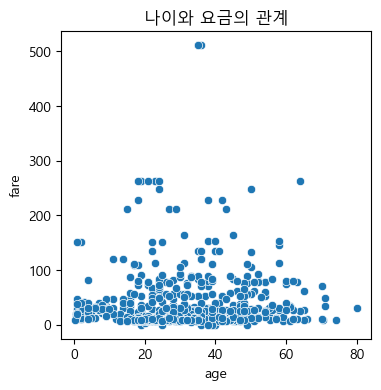

In [9]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=titanic, x='age', y='fare')
plt.title('나이와 요금의 관계')
plt.show()

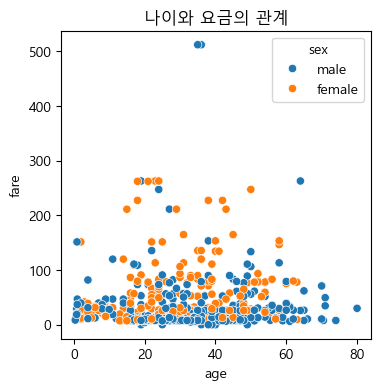

In [94]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')
plt.title('나이와 요금의 관계')
plt.show()

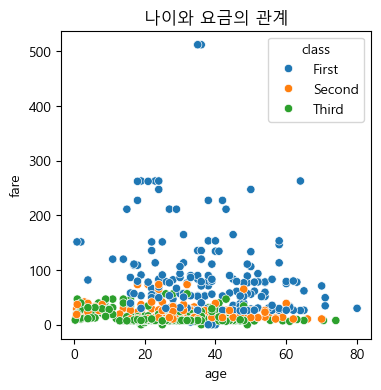

In [95]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=titanic, x='age', y='fare', hue='class')
plt.title('나이와 요금의 관계')
plt.show()

7. 생존 여부에 따른 요금 분포

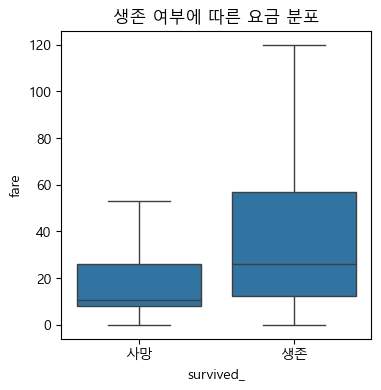

In [93]:
plt.figure(figsize=(4,4))
sns.boxplot(data=titanic, x='survived_', y='fare', showfliers=False)
plt.title('생존 여부에 따른 요금 분포')
plt.show()

8. who에 따른 평균생존율

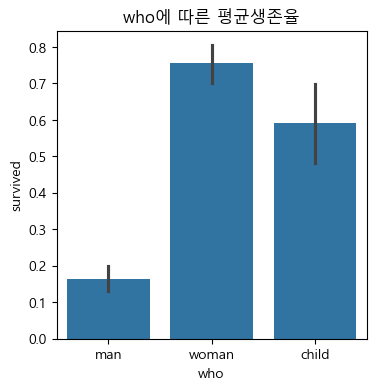

In [11]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, x='who', y='survived')
plt.title('who에 따른 평균생존율')
plt.show()

9. 클래스 & 성별에 따른 요금 분포

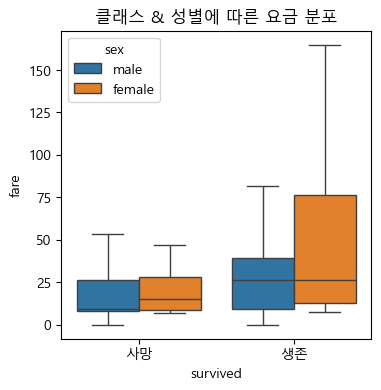

In [12]:
plt.figure(figsize=(4,4))
sns.boxplot(data=titanic, x='survived', y='fare', hue='sex', showfliers=False)
plt.title('클래스 & 성별에 따른 요금 분포')
plt.xticks([0,1], ['사망', '생존'])
plt.show()

10. 성별과 클래스에 따른 생존자 수

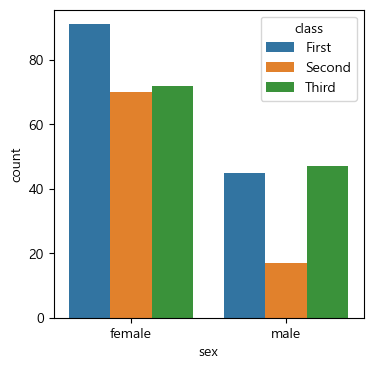

In [99]:
data = titanic[titanic['survived'] == 1]
plt.figure(figsize=(4,4))
sns.countplot(data=data, x='sex', hue='class')
plt.show()

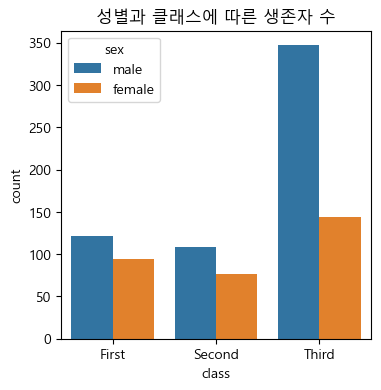

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(data=titanic, x='class', hue='sex')
plt.title('성별과 클래스에 따른 생존자 수')
plt.show()

11. 탑승 위치에 따른 승객 수

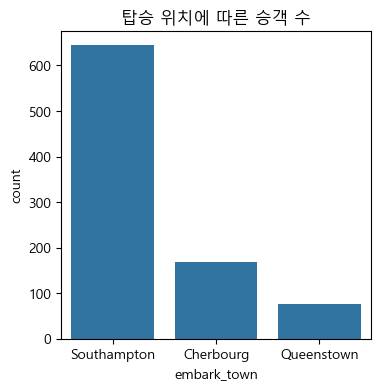

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(data=titanic, x='embark_town')
plt.title('탑승 위치에 따른 승객 수')
plt.show()

12. 연령을 구간으로 나누고 연령대에 따른 생존율(연령대: 10살미만, 10대, 20대, 30대, 40대, 50대, 60대, 70대...)

In [15]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10살미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']

titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20대
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30대
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20대
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30대
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30대


In [16]:
titanic.age_group.value_counts()

age_group
20대      220
30대      167
10대      102
40대       89
10살미만     62
50대       48
60대       19
70대        6
80대        1
Name: count, dtype: int64

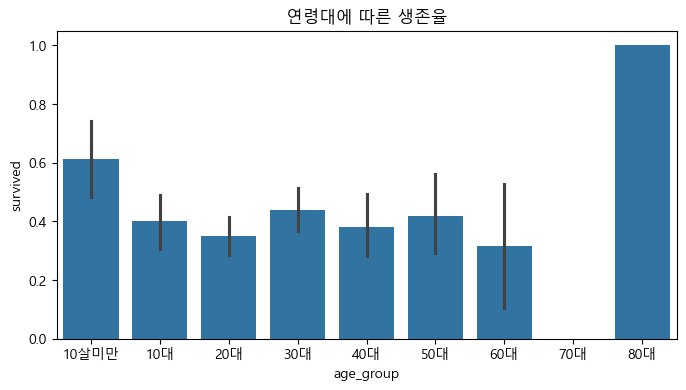

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(data=titanic, x='age_group', y='survived')
plt.title('연령대에 따른 생존율')
plt.show()

13. 탑승 위치와 클래스별 생존율 차이

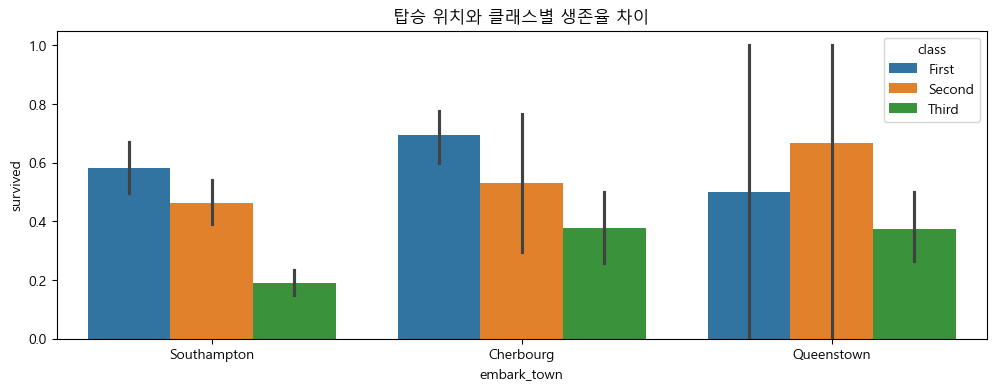

In [114]:
plt.figure(figsize=(12,4))
sns.barplot(data=titanic, x='embark_town', y='survived', hue='class')
plt.title('탑승 위치와 클래스별 생존율 차이')
plt.show()

14. 나이에 따라 생존 확률이 어떻게 변화하는지 선그래프로 확인

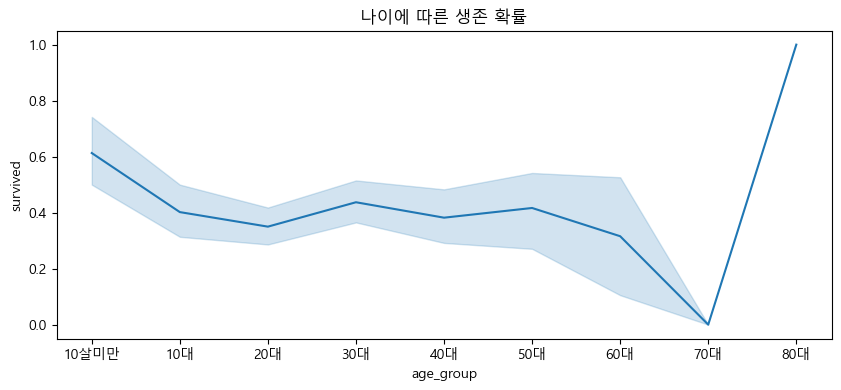

In [115]:
plt.figure(figsize=(10,4))
sns.lineplot(data=titanic, x='age_group', y='survived')
plt.title('나이에 따른 생존 확률')
plt.show()

In [118]:
data = titanic[['age', 'survived']].dropna()
labels=['10세미만']+[str(i)+'대' for i in range(10, 90, 10)]
data['age_bin'] = pd.cut(data['age'], bins=[0] + list(range(9,90,10)), labels=labels)
data_gb = data.groupby('age_bin')['survived'].mean().reset_index()
data_gb

C:\Users\acorn1\AppData\Local\Temp\ipykernel_8712\3197501749.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_gb = data.groupby('age_bin')['survived'].mean().reset_index()


,age_bin,survived
0,10세미만,0.612903
1,10대,0.401961
2,20대,0.350000
3,30대,0.437126
4,40대,0.382022
5,50대,0.416667
6,60대,0.315789
7,70대,0.000000
8,80대,1.000000


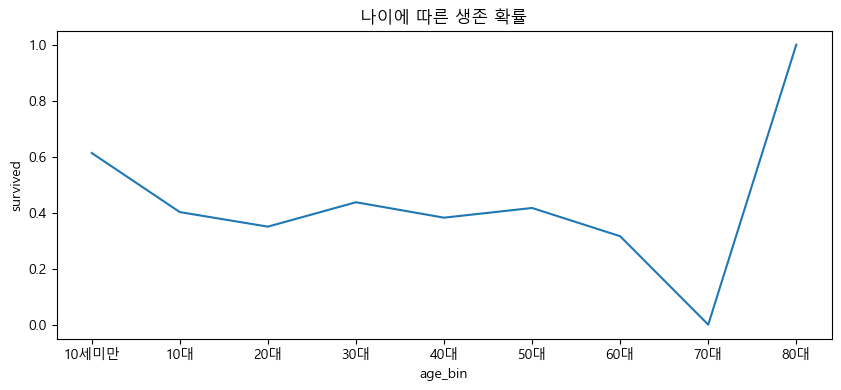

In [119]:
plt.figure(figsize=(10,4))
sns.lineplot(data=data_gb, x='age_bin', y='survived')
plt.title('나이에 따른 생존 확률')
plt.show()

15. 함께 탄 형제자매/배우자수(sibsp)에 따른 생존률 비교

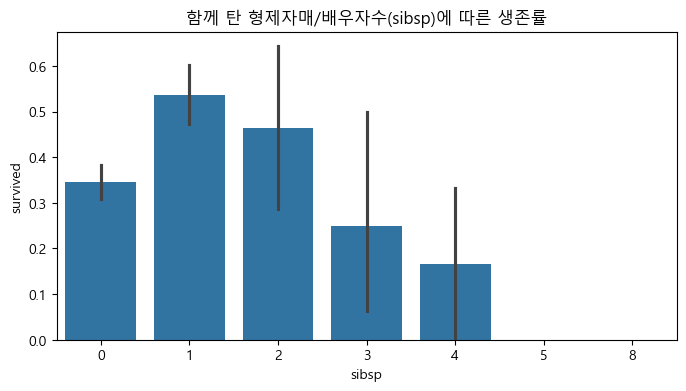

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(data=titanic, x='sibsp', y='survived')
plt.title('함께 탄 형제자매/배우자수(sibsp)에 따른 생존률')
plt.show()

16. 부모/자녀수(parch)와 생존률의 관계

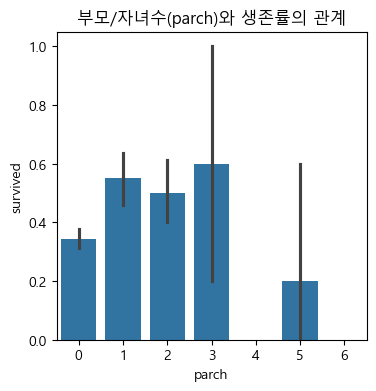

In [120]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, x='parch', y='survived')
plt.title('부모/자녀수(parch)와 생존률의 관계')
plt.show()

17. 성별, 클래스, 생존 여부를 조합하여 그룹별 승객 수 시각화

<Figure size 800x400 with 0 Axes>

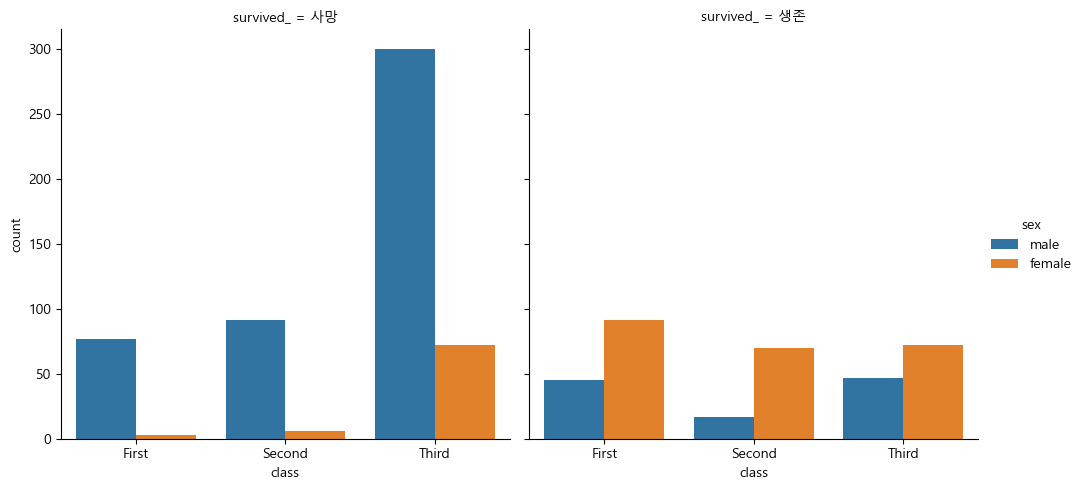

In [121]:
plt.figure(figsize=(8,4))
sns.catplot(kind='count', data=titanic, x='class', hue='sex', col='survived_')
# plt.title('성별, 클래스, 생존 여부를 조합하여 그룹별 승객 수')
plt.show()

18. 생존자와 사망자의 나이 분포를 비교하는 KDE그래프 시각화

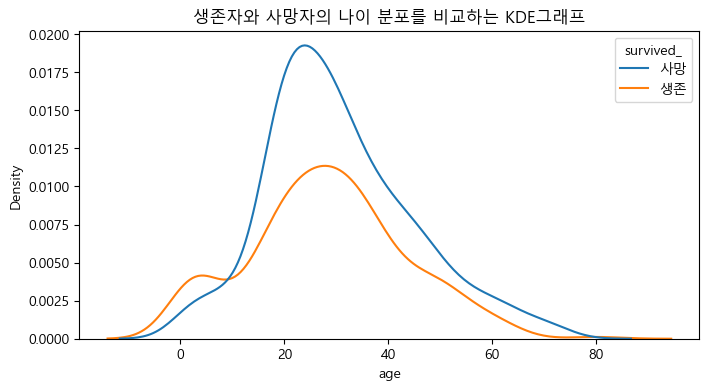

In [122]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=titanic, x='age', hue='survived_')
plt.title('생존자와 사망자의 나이 분포를 비교하는 KDE그래프')
plt.show()

19. 탑승 클래스에 따른 나이 분포를 바이올린 플롯으로 시각화

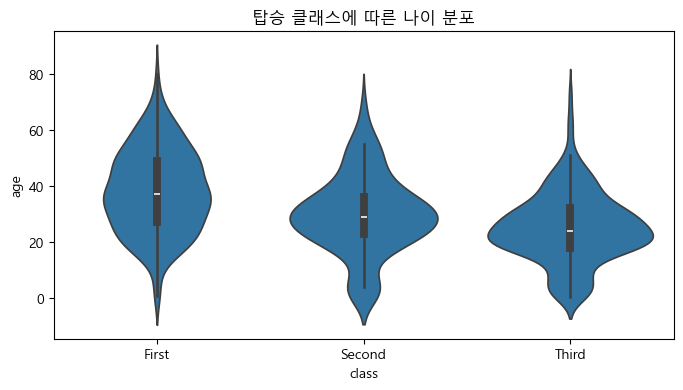

In [24]:
plt.figure(figsize=(8,4))
sns.violinplot(data=titanic, x='class', y='age')
plt.title('탑승 클래스에 따른 나이 분포')
plt.show()

20. 연령대에 따라 생존률이 달라지는 것을 히트맵으로 시각화

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20대
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30대
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20대
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30대
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30대


In [126]:
titanic.groupby(['survived','age_group'], observed=False).size()

age_group,10살미만,10대,20대,30대,40대,50대,60대,70대,80대
survived,,,,,,,,,
0,24,61,143,94,55,28,13,6,0
1,38,41,77,73,34,20,6,0,1


In [123]:
tit = titanic.groupby(['survived','age_group'], observed=False).size().unstack()
tit = pd.DataFrame(tit.loc[1] / tit.sum()).T

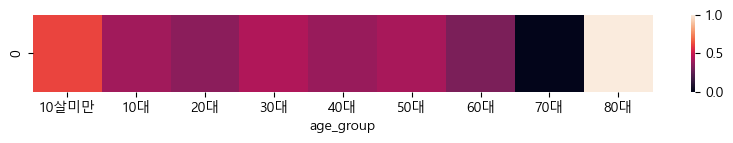

In [124]:
plt.figure(figsize=(10,1))
sns.heatmap(data=tit)
plt.show()

- 클래스와 연령대에 따른 생존률을 히트맵으로 시각화

In [128]:
data = pd.pivot_table(data=titanic, index='class', columns='age_group', values='survived', aggfunc='mean')
data

C:\Users\acorn1\AppData\Local\Temp\ipykernel_8712\1587993.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data = pd.pivot_table(data=titanic, index='class', columns='age_group', values='survived', aggfunc='mean')


age_group,10살미만,10대,20대,30대,40대,50대,60대,70대,80대
class,,,,,,,,,
First,0.666667,0.833333,0.705882,0.780000,0.594595,0.555556,0.307692,0.0,1.0
Second,1.000000,0.500000,0.415094,0.395833,0.555556,0.333333,0.333333,0.0,NaN
Third,0.452381,0.257576,0.233083,0.217391,0.058824,0.000000,0.333333,0.0,NaN


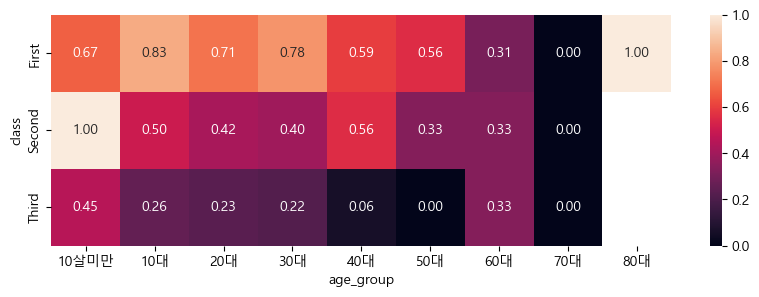

In [132]:
plt.figure(figsize=(10,3))
sns.heatmap(data=data, annot=True, fmt='.2f')
plt.show()

---